STATISTICAL METHODS FOR DECISIONS MAKING


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as st

1. The Bangalore International Airport Ltd.(BIAL) maintains statistics for mishandled baggage per 1,000 airline passengers. In the last year 2018-19, on average, they mishandled 1.5 baggage per 1,000 customers. What is the probability that in the next 1,000 customers, BIAL will have

a.	no mishandled baggage (1 MARK)

b.	at least one mishandled baggage (2 MARKS) 

c.	at most 3 mishandled baggage (2 MARKS)


In [3]:
lamda = 1.5
print('the probability that BIAL will have no mishandled baggage',st.poisson.pmf(0,lamda))


the probability that BIAL will have no mishandled baggage 0.22313016014842982


In [4]:
print('the probability that BIAL will have at least one mishandled baggage', 1-st.poisson.pmf(0,lamda))

the probability that BIAL will have at least one mishandled baggage 0.7768698398515702


In [5]:
print('the probability that BIAL will have at most 3 mishandled baggage', st.poisson.cdf(3,lamda))

the probability that BIAL will have at most 3 mishandled baggage 0.9343575456215499


2. The below data contains the weight of 20 random ‘LAYS’ packets in grams.
 9.0, 8.8, 10.2, 7.4,9.5, 7.0, 6.6, 9.6, 9.9, 7.6, 7.4, 11.6, 10.4, 11.1, 8.5, 10.0, 10.7, 10.3, 11.2, and 8.0 
 
a.	Is the mean weight of all (Population) LAYS packets μ = 10 grams different from the mean weight of this sample? (3 MARKS)

b.	Find the 95% confidence interval. (2 MARKS)





* H<sub>0</sub>: x&#772; - &mu; = 0, that is there is no difference between my sample mean and the value of &mu;.
* H<sub>a</sub>: x&#772; - &mu; &ne; 0 (two-sided test)
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
* degrees of freedom: d<sub>f</sub> = N-1
* t-critical for specified alpha level: t<sub>*</sub> = 2.093
* t-statistic: t = (x&#772; - &mu;)/(s/sqrt(N)) where s is the sample standard deviation.

In [21]:
x = [9.0, 8.8, 10.2, 7.4,9.5, 7.0, 6.6,9.6, 9.9, 7.6, 7.4, 11.6, 10.4, 11.1, 8.5, 10.0, 10.7, 10.3, 11.2, 8.0]


In [22]:
len(x)

20

In [23]:
#5% alpha, dof = 19 leads to tc = 2.093

In [24]:
import numpy as np
from scipy import stats
mu = 10
t_critical = 2.093
x_bar = np.array(x).mean()
s = np.array(x).std(ddof=1) # subtract 1 from N to get unbiased estimate of sample standard deviation
N = len(x)
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)

t-statistic:  -2.2491611580763924


In [29]:
print(1-st.t.sf(t,N-1))*2

0.036555622791124565

In [13]:
print(stats.ttest_1samp(x, 10))

Ttest_1sampResult(statistic=-2.249161158076392, pvalue=0.03655562279112455)


In [14]:
# OR using inbuilt python functions for one sample----stats.ttest_1samp(x, mean)
# a one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t =  -2.249161158076392 , p =  0.03655562279112455


In [15]:
if p/2 < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [16]:
# margin of error
err = t_critical*SE
x_low = x_bar - err # margins
x_high = x_bar + err
print("x_bar = {}, 95% CI [{}, {}]".format(x_bar.round(2), x_low.round(2), x_high.round(2)))

# OR
# you can also get CIs by using the build int t-distribution function like this:
print("CI using scipy: ",stats.t.interval(0.95, N-1, loc=x_bar, scale=SE)) # arguments: (CI, dof, mean, std)

x_bar = 9.24, 95% CI [8.53, 9.95]
CI using scipy:  (8.532759313560824, 9.947240686439176)


In [14]:
stats.t.interval(0.95, N-1, loc=x_bar, scale=SE) # scale = standard error, location = sample mean

(8.532759313560824, 9.947240686439176)

In [15]:
np.mean(x) # 8.5, 9.94

9.24

3. A set of final examination grades in SMDM course is normally distributed with a mean of 70 and a standard deviation of 10. If the professor gives grade A for the top 10% of the class regardless of their scores, are you better off with a grade of 81 in this exam or a grade of 65 in a different exam, where the mean is 60 and standard deviation is 5? Show your answer statistically and explain?

In [20]:
# Option 1
exam1_mean = 70
exam1_sd = 10
prob_score_exam1 = st.norm.cdf(81,70,10)
z_score_exam1 = st.norm.ppf(prob_score_exam1)

# Option 2
exam2_mean = 60
exam2_sd = 5
prob_score_exam2 = st.norm.cdf(65,60,5)
z_score_exam2 = st.norm.ppf(prob_score_exam1)
print(z_score_exam1,z_score_exam2)

1.0999999999999999 1.0999999999999999


No difference, both are same. 

4. A company manufacturing Cola has studied the effect of its latest advertising campaign and then measured the number of cans of Cola purchased. A simple linear regression model was fitted for number of cans of Cola purchased (Y) with number of advertisements (X). The fitted regression model is Y = 3.331 + 1.711 X. The coefficient of determination was 0.619, but the adjusted R-square was 0.555. 

a. Find the coefficient of correlation between X and Y (1 mark)

b. Interpret the values on regression coefficient, correlation coefficient, coefficient of determination and adjusted R-square (4 marks)



In [22]:
# a. Coefficient of correlation
rsquare = 0.619
r = np.sqrt(rsquare)
print('Coefficient of correlation is', r)

Coefficient of correlation is 0.7867655305108378


b. (i)regression coefficient = 1.711
 The changes in the value of 'y'  for every one unit change in x is 1.711
 
 (ii) correlation coefficient = 0.786
 There is a high positive corerelationship between y and x. It gives only the intensity of the relationship.
 
 (iii) coefficient of determination( R square)= 0.619
 Only 61.9% changes in y can be explained by changes in x. It is square of multiple correlation coefficient. It is also expressed as ratio of Sum of Square Regression(SSR) to Sum of Square Total(SST)
 
 (iv)Adjusted R Square = 0.555 
 It does consider number of observations and number of features to correct the R square value. It is given as 
 
 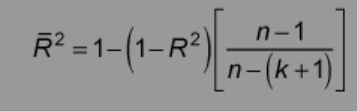


5.	Multiple myeloma or blood plasma cancer is characterised by increased by blood vessel formulation (angiogenesis) in the bone marrow that is a predictive factor in survival. One treatment approach used for multiple myeloma is stem cell transplantation with the patient’s own stem cells. The data given below represents the bone marrow micro vessel density for patients who had a complete response to the stem cell transplant (as measured by blood and urine tests). The measurements were taken immediately prior to the stem cell transplant and at the time the complete response was determined. (10 MARKS)

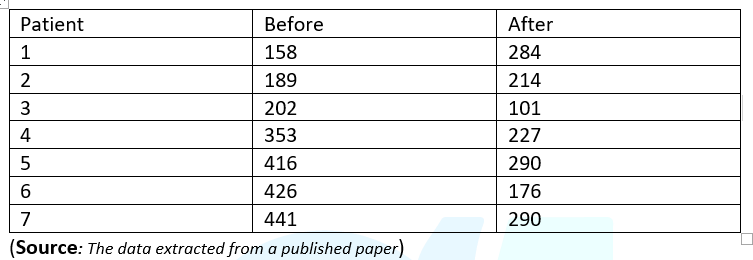


a.	At the 0.05 level of significance, is there evidence that the mean bone marrow micro vessel density is higher before the stem cell transplant than after the stem cell transplant? (5 MARKS)

b.	Interpret the meaning of test statistic and p-value from the result. (3 MARKS)

c.	Construct and interpret the 95% confidence interval estimation of the mean difference in bone marrow micro vessel density before and after stem cell transplant. (2 MARKS)


In [18]:
mvd_before_stem_transplant = np.array([158,189,202,353,416,426,441])
mvd_after_stem_transplant = np.array([284,214,101,227,290,176,290])
sample_size = len(mvd_after_stem_transplant)

H0: The mean difference of micro vessel density before and after is zero.
H1: The mean difference of micro vessel density before and after is not zero.

Assuming level of significance = 0.05

In [19]:
st.ttest_rel(mvd_after_stem_transplant, mvd_before_stem_transplant)

Ttest_relResult(statistic=-1.8424550291027728, pvalue=0.11498626687185708)

In [27]:
t_critical = st.t.isf(0.05,sample_size-1)
print(t_critical)

1.9431802803927818


Since p value is more than level of significance, we have to accept null hypothesis. It means there is no difference of MVD before and after the stem transplant. 
And t test statistic is less than t_critical, we have to accept null hypothesis.

In [40]:
## Confidence interval 
difference = mvd_after_stem_transplant-mvd_before_stem_transplant
mean_difference = np.mean(difference)
sd_difference = np.std(difference)
se_difference = sd_difference/np.sqrt(sample_size)
st.t.interval(0.95, (sample_size-1), mean_difference, se_difference)

(-192.06025556183695, 19.774541276122676)

6. The mass of N1=20 acorns from oak trees up wind from a coal power plant and N2=30 acorns from oak trees downwind from the same coal power plant are measured. Are the acorns from trees downwind less massive then the ones from up wind? The sample sizes are not equal but we will assume that the population variance of sample 1 and sample 2 are equal. alpha = 0.05, t-critical for specified alpha level = -1.677

Samples are given below. State the Null and Alternate hypothesis. 
Which test would be used here? Do you reject or retain the H0 based on your test? Find the t-statistic, Confidence Interval and p value.                                                                                   
(10 MARKS)

#### sample up wind
x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

##### sample downwind: x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6, 7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]


In [1]:
# sample up wind

x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 
      7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

In [2]:
# sample down wind

x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 
      9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6,
      7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

In [6]:
#Solution

# equal sample size and assume equal population variance
import numpy as np
t_critical = 1.677
N1 = len(x1)
N2 = len(x2)
d1 = N1-1
d2 = N2-1
df = d1+d2
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)
t = (x2_bar - x1_bar)/(se)
print("t-statistic", t)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = st.ttest_ind(x2, x1, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t-statistic -3.5981947686898033
t =  -3.5981947686898033 , p_twosided =  0.0007560337478801464 , p_onesided = 0.0003780168739400732


In [44]:
print("Confidence Interval:")
print("x2_bar - x1_bar = ", x2_bar - x1_bar, ", 95% CI ",stats.t.interval(0.95, df, loc=x2_bar-x1_bar, scale=se))
print("Cohen's Effect Size, d:")
print("d = ", (x2_bar - x1_bar)/sp)

rsq = t**2 / (t**2 + df)
print("r_squared = ", rsq) # 34.5 % of the variation between samples can be explained by the switch to nat. gas

Confidence Interval:
x2_bar - x1_bar =  -1.3350000000000026 , 95% CI  (-2.0809844644533113, -0.589015535546694)
Cohen's Effect Size, d:
d =  -1.0387093591498806
r_squared =  0.21243054465702976


7.	a) The below data is scores of ‘BRICS’ countries on ‘Starting a business’. It is collected from ‘Doingbusineess.org’, a part of World Bank Group. Is the score of ‘Starting a business depends on the country or time or both? 

a.	State your hypothesis statements and level of significance (2 MARKS)

b.	State which test do you apply assuming the ‘score’ follows normal distribution and determine the test results. (4 MARKS)

c.	Interpret the results obtained (2 MARKS)

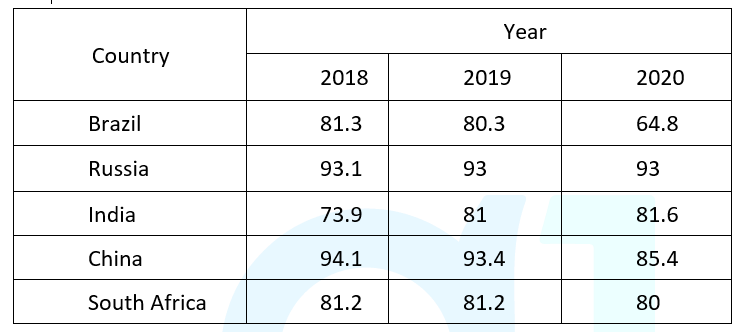



In [2]:
## Is score of starting a business depending on time(Year)?
# H0: There is no difference in the average score of Starting a business w.r.t year
# H1: There is a difference in the average score of Starting a business w.r.t year.

## Is score of starting a business depending on country?
# H0: There is no difference in the average score of Starting a business w.r.t country
# H1: There is a difference in the average score of Starting a business w.r.t country.
alpha = 0.05
score_df = pd.DataFrame({'Score': [81.3,80.3,64.8,93.1,93,93,73.9,81,81.6,
                         94.1,93.4,85.4,81.2,81.2,80], 
                         'Country': ['Brazil','Brazil','Brazil',
                                     'Russia','Russia','Russia',
                                     'India','India','India',
                                     'China','China','China',
                                    'SA','SA','SA'], 
                         'Year': ['2018','2019','2020',
                                 '2018','2019','2020',
                                 '2018','2019','2020',
                                 '2018','2019','2020',
                                 '2018','2019','2020']})


In [3]:
score_df.head()

,Score,Country,Year
0,81.3,Brazil,2018
1,80.3,Brazil,2019
2,64.8,Brazil,2020
3,93.1,Russia,2018
4,93.0,Russia,2019


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api  import ols

In [14]:
two_way_anov = ols('Score~Country+Year', data = score_df).fit()
anova_table = sm.stats.anova_lm(two_way_anov,typ=1)
print(anova_table)

           df      sum_sq     mean_sq         F    PR(>F)
Country   4.0  719.177333  179.794333  7.515281  0.008118
Year      2.0   64.156000   32.078000  1.340839  0.314631
Residual  8.0  191.390667   23.923833       NaN       NaN


Conclusion: The above results indicates that the score depends on country not the year. 

b) Four brands of bulbs were tested for their lifetime (in ‘000 hours). From the following data obtained, test whether the life duration of the bulbs is significantly different. If it is significant, which pair of methods (Make type) has significantly different (Post-hoc analysis) and write your inferences. (7 marks)

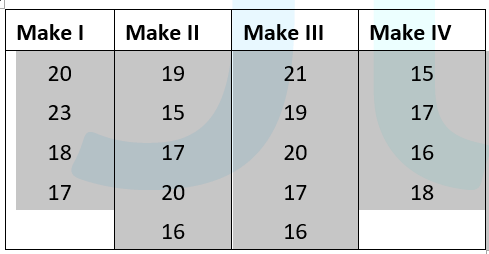

In [70]:
# H0: There is no difference in the average life duration w.r.t make type
# H1: There is a difference in the average life duration w.r.t make type
alpha =0.05
dof_numerator = 4-1
dof_denominator = 18-4
m1= [20,23,18,17]
m2=[19,15,17,20,16] 
m3=[21,19,20,17,16]
m4=[15,17,16,18]
f_critical = st.f.isf(0.05,dof_numerator,dof_denominator)

print("F critical value is",f_critical)

st.f_oneway(m1,m2,m3,m4)

F critical value is 3.3438886781189123


F_onewayResult(statistic=1.6688741721854305, pvalue=0.21909520543565303)

Since F statistic is less than F critical value and also p value is more than alpha(0.05) accept null hypothesis. It means there is no difference in the average duration of bulb w.r.t make type.

8.	The following data relates to the scores obtained by a salesman of a company in an intelligence test and their weekly sales (in Rs.1000’s):

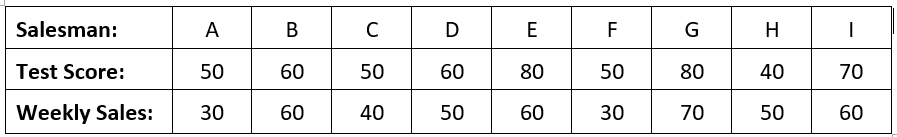


a.	Obtain the regression equation of sales on intelligence test scores of the salesman. and write your inferences on the results of regression model. (10 marks)

b.	If the intelligence test score of a salesman is 65, what would be his expected weekly sales?  (5 marks)


In [71]:
data = pd.DataFrame({'salesman': ['A','B','C','D','E','F','G','H','I'],
                    'Test_Score':[50,60,50,60,80,50,80,40,70],
                    'Weekly_Sales':[30,60,40,50,60,30,70,50,60]}).set_index('salesman')
data.head()

,Test_Score,Weekly_Sales
salesman,,
A,50,30
B,60,60
C,50,40
D,60,50
E,80,60


In [72]:
# Check the descriptive statistics of test score and weekly sales.
data.describe()

,Test_Score,Weekly_Sales
count,9.000000,9.000000
mean,60.000000,50.000000
std,14.142136,14.142136
min,40.000000,30.000000
25%,50.000000,40.000000
50%,60.000000,50.000000
75%,70.000000,60.000000
max,80.000000,70.000000


In [73]:
# Check the correlation between test score and weekly sales.
data.corr()

,Test_Score,Weekly_Sales
Test_Score,1.00,0.75
Weekly_Sales,0.75,1.00


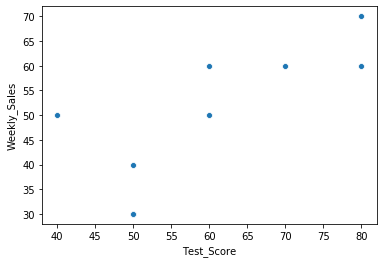

In [76]:
# Draw scatterplot between test score and weekly sales.
sn.scatterplot(y='Weekly_Sales',x='Test_Score', data=data)

In [77]:
# Creating model with help of OLS:
from statsmodels.formula.api import ols
model1 = ols('Weekly_Sales ~ Test_Score', data= data).fit()
model1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     9.000
Date:                Fri, 17 Jan 2020   Prob (F-statistic):             0.0199
Time:                        19:09:19   Log-Likelihood:                -32.363
No. Observations:                   9   AIC:                             68.73
Df Residuals:                       7   BIC:                             69.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0000     15.366      0.325      0.754     -31.335      41.335
Test_Score     0.7500      0.250      3.000      0.020       0.159       1.341
==============================================================================
Omnibus:                        0.173   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.358
Skew:                           0.076   Prob(JB):                        0.836
Kurtosis:                       2.035   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model results, we can infer that only 56% ( R_square) of variation in Weekly_sales is explained by Test Score.

In [78]:
# b. If the intelligence test score of a salesman is 65, 
 # what would be his expected weekly sales?  (5 marks) 
intelligent_test_score = 65
Exp_weekly_sales = 5 + 0.75*intelligent_test_score
print('The expected weekly sales is',Exp_weekly_sales)

The expected weekly sales is 53.75


***********************END****************